# Further Data Investigation
> Shea's

In [ ]:
import datetime as dt
import seaborn as sns

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
pd.set_option("display.max_rows", 100)

In [ ]:
df = mega_table

In [ ]:
df['indiv_id']= df['indiv_id'].apply(str)

### Question 1
Total individuals / How many additional individuals are there each month?

In [ ]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['date']

0         2018-07-23
1         2018-07-23
2         2018-07-23
3         2018-07-23
4         2018-07-23
             ...    
4000499   2017-11-30
4000500   2017-11-30
4000501   2017-11-30
4000502   2017-11-30
4000503   2017-11-30
Name: date, Length: 4000504, dtype: datetime64[ns]

In [ ]:
df['year_month'] = df['date'].dt.to_period('M')

In [ ]:
by_year_month = df.groupby(['year_month']).agg(
    transactions_count = pd.NamedAgg(column='tran_id', aggfunc='nunique')
    ,products_sold_count = pd.NamedAgg(column='article_id', aggfunc='count')
    ,unique_customers = pd.NamedAgg(column='indiv_id', aggfunc='count')
    ,revenue_total = pd.NamedAgg(column='sales', aggfunc='sum')
)

by_year_month

,transactions_count,products_sold_count,unique_customers,revenue_total
year_month,,,,
2015-04,9989,96936,96936,1810270.56
2015-05,10586,106625,106625,1867061.47
2015-06,10693,108219,108219,1910143.07
2015-07,10809,104384,104384,1909358.89
2015-08,10734,107192,107192,1872105.35
2015-09,10232,99935,99935,1830328.93
2015-10,10764,103191,103191,1876850.95
2015-11,10103,99830,99830,1890529.59
2015-12,9249,86378,86378,1605891.31


### Question 2
How many customers do we see twice?

In [ ]:
by_customer = df.groupby(['indiv_id']).agg(
    transactions_count = pd.NamedAgg(column='tran_id', aggfunc='nunique')
)

## 68% more than 1 transaction

In [ ]:
by_customer

,transactions_count
indiv_id,
251635131.0,7
251636073.0,18
251636235.0,1
251636752.0,10
251638270.0,9
...,...
654009201.0,5
654197901.0,7
654387841.0,2


In [ ]:
by_customer[by_customer['transactions_count'] > 1]

,transactions_count
indiv_id,
251635131.0,7
251636073.0,18
251636752.0,10
251638270.0,9
251638440.0,6
...,...
654009201.0,5
654197901.0,7
654387841.0,2


In [ ]:
customer_range = by_customer[by_customer['transactions_count'] > 1]
customer_range = customer_range[customer_range['transactions_count'] < 20]

customer_range

,transactions_count
indiv_id,
251635131.0,7
251636073.0,18
251636752.0,10
251638270.0,9
251638440.0,6
...,...
654009201.0,5
654197901.0,7
654387841.0,2


<AxesSubplot:xlabel='transactions_count', ylabel='Count'>

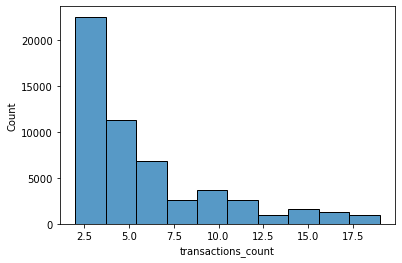

In [ ]:
sns.histplot(data=customer_range, x='transactions_count', bins = 10)

In [ ]:
by_customer[by_customer['transactions_count'] == 1]

,transactions_count
indiv_id,
251636235.0,1
251638663.0,1
251655159.0,1
251655331.0,1
251659836.0,1
...,...
641646100.0,1
642822427.0,1
651591593.0,1


In [ ]:
# 1 transaction
df[df['indiv_id'] == '251636235.0'].sort_values(by='date', axis=0)

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,prod_group_desc,category_code,category_desc,segment_code,segment_desc,class_code,class_desc,discount_flag,cross_section,aspect_ratio,rim_size,state_code,zip_code,msa,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year,year_month
3849320,3849321,13420,991370640,2015-06-11,7046930,251636235.0,928757722,0.0,0.0,4.0,Services,81.0,Miscellaneous Services,109.0,Inspection Services,473.0,Courtesy Check,N,NaN,NaN,NaN,CA,91786,"RIVERSIDE,",534,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-06


In [ ]:
# 2 transactions
df[df['indiv_id'] == '654387841.0'].sort_values(by='date', axis=0)

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,prod_group_desc,category_code,category_desc,segment_code,segment_desc,class_code,class_desc,discount_flag,cross_section,aspect_ratio,rim_size,state_code,zip_code,msa,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year,year_month
3802766,3802767,25380,991389500,2015-12-08,7046930,654387841.0,925047750,0.0,0.00,4.0,Services,81.0,Miscellaneous Services,109.0,Inspection Services,473.0,Courtesy Check,N,NaN,NaN,NaN,CA,92021,"SAN DIEGO,",16820812,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-12
3802767,3802768,25380,991389500,2015-12-08,7001121,654387841.0,925047750,0.0,0.00,4.0,Services,62.0,Tire Services,91.0,Tire Services,145.0,Tire Rotation,N,NaN,NaN,NaN,CA,92021,"SAN DIEGO,",16820812,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-12
1811929,1811930,25380,991461580,2016-10-02,7001123,654387841.0,925047750,0.0,0.00,4.0,Services,62.0,Tire Services,91.0,Tire Services,155.0,Misc. Tire Service,N,NaN,NaN,NaN,CA,92021,"SAN DIEGO,",16820812,Y,R,N,NaN,NaN,NaN,NaN,NaN,2016-10
1811930,1811931,25380,991461580,2016-10-02,7024341,654387841.0,925047750,0.0,3.00,4.0,Services,62.0,Tire Services,91.0,Tire Services,151.0,Valves,N,NaN,NaN,NaN,CA,92021,"SAN DIEGO,",16820812,Y,R,N,NaN,NaN,NaN,NaN,NaN,2016-10
1811931,1811932,25380,991461580,2016-10-02,7013627,654387841.0,925047750,0.0,-18.99,4.0,Services,62.0,Tire Services,91.0,Tire Services,147.0,Balance,N,NaN,NaN,NaN,CA,92021,"SAN DIEGO,",16820812,Y,R,N,NaN,NaN,NaN,NaN,NaN,2016-10
1811932,1811933,25380,991461580,2016-10-02,7097782,654387841.0,925047750,0.0,9.71,5.0,Tires,20158.0,Road Hazard,20159.0,Road Hazard,20160.0,Road Hazard,N,NONE,NONE,NONE,CA,92021,"SAN DIEGO,",16820812,Y,R,N,NaN,NaN,NaN,NaN,NaN,2016-10
1811933,1811934,25380,991461580,2016-10-02,4013,654387841.0,925047750,1.0,33.50,5.0,Tires,26.0,Passenger Tires,30.0,P Metric Light Truck Tires,41.0,Highway Tires,N,215,70,16,CA,92021,"SAN DIEGO,",16820812,Y,R,N,NaN,NaN,NaN,NaN,NaN,2016-10
1811934,1811935,25380,991461580,2016-10-02,7015016,654387841.0,925047750,0.0,0.00,4.0,Services,62.0,Tire Services,91.0,Tire Services,139.0,Tire Mounting,N,NaN,NaN,NaN,CA,92021,"SAN DIEGO,",16820812,Y,R,N,NaN,NaN,NaN,NaN,NaN,2016-10


In [ ]:
# 5 transactions
df[df['indiv_id'] == '654009201.0'].sort_values(by='date', axis=0)

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,prod_group_desc,category_code,category_desc,segment_code,segment_desc,class_code,class_desc,discount_flag,cross_section,aspect_ratio,rim_size,state_code,zip_code,msa,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year,year_month
2821751,2821752,29815,992275330,2015-04-03,7006119,654009201.0,912844803,1.0,40.00,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,N,NaN,NaN,NaN,CA,94545,"OAKLAND,CA",16820218,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2821756,2821757,29815,992275330,2015-04-03,7004613,654009201.0,912844803,0.0,0.00,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,Y,NaN,NaN,NaN,CA,94545,"OAKLAND,CA",16820218,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2821754,2821755,29815,992275330,2015-04-03,7003287,654009201.0,912844803,0.0,-1.50,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,Y,NaN,NaN,NaN,CA,94545,"OAKLAND,CA",16820218,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2821753,2821754,29815,992275330,2015-04-03,7003287,654009201.0,912844803,0.0,0.00,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,Y,NaN,NaN,NaN,CA,94545,"OAKLAND,CA",16820218,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2821755,2821756,29815,992275330,2015-04-03,7004613,654009201.0,912844803,0.0,-12.00,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,Y,NaN,NaN,NaN,CA,94545,"OAKLAND,CA",16820218,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2821747,2821748,29815,992275330,2015-04-03,7005845,654009201.0,912844803,0.0,5.00,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,N,NaN,NaN,NaN,CA,94545,"OAKLAND,CA",16820218,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2821748,2821749,29815,992275330,2015-04-03,7046930,654009201.0,912844803,0.0,0.00,4.0,Services,81.0,Miscellaneous Services,109.0,Inspection Services,473.0,Courtesy Check,N,NaN,NaN,NaN,CA,94545,"OAKLAND,CA",16820218,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2821749,2821750,29815,992275330,2015-04-03,7001674,654009201.0,912844803,0.0,-1.50,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,Y,NaN,NaN,NaN,CA,94545,"OAKLAND,CA",16820218,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2821752,2821753,29815,992275330,2015-04-03,7006949,654009201.0,912844803,1.0,4.99,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,N,NaN,NaN,NaN,CA,94545,"OAKLAND,CA",16820218,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2821750,2821751,29815,992275330,2015-04-03,7001674,654009201.0,912844803,0.0,0.00,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,Y,NaN,NaN,NaN,CA,94545,"OAKLAND,CA",16820218,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04


In [ ]:
# 7 transactions
df[df['indiv_id'] == '251635131.0'].sort_values(by='date', axis=0)

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,prod_group_desc,category_code,category_desc,segment_code,segment_desc,class_code,class_desc,discount_flag,cross_section,aspect_ratio,rim_size,state_code,zip_code,msa,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year,year_month
2840662,2840663,779,991502880,2015-04-10,7015016,251635131.0,931153286,0.0,0.00,4.0,Services,62.0,Tire Services,91.0,Tire Services,139.0,Tire Mounting,N,NaN,NaN,NaN,CT,6604,BRIDGEPORT,204,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2840669,2840670,779,991502880,2015-04-10,7046930,251635131.0,931153286,0.0,0.00,4.0,Services,81.0,Miscellaneous Services,109.0,Inspection Services,473.0,Courtesy Check,N,NaN,NaN,NaN,CT,6604,BRIDGEPORT,204,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2840670,2840671,779,991502880,2015-04-10,7000614,251635131.0,931153286,1.0,25.00,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,N,NaN,NaN,NaN,CT,6604,BRIDGEPORT,204,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2840671,2840672,779,991502880,2015-04-10,7001690,251635131.0,931153286,0.0,0.00,4.0,Services,62.0,Tire Services,91.0,Tire Services,147.0,Balance,Y,NaN,NaN,NaN,CT,6604,BRIDGEPORT,204,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2840672,2840673,779,991502880,2015-04-10,7006949,251635131.0,931153286,1.0,4.99,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,N,NaN,NaN,NaN,CT,6604,BRIDGEPORT,204,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2840658,2840659,779,991502880,2015-04-10,7013650,251635131.0,931153286,0.0,55.96,4.0,Services,62.0,Tire Services,91.0,Tire Services,147.0,Balance,N,NaN,NaN,NaN,CT,6604,BRIDGEPORT,204,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2840666,2840667,779,991502880,2015-04-10,7001674,251635131.0,931153286,0.0,-29.99,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,Y,NaN,NaN,NaN,CT,6604,BRIDGEPORT,204,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2840665,2840666,779,991502880,2015-04-10,7001674,251635131.0,931153286,0.0,-5.00,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,Y,NaN,NaN,NaN,CT,6604,BRIDGEPORT,204,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2840664,2840665,779,991502880,2015-04-10,7001718,251635131.0,931153286,0.0,-0.47,4.0,Services,22030.0,Discount All Services,22031.0,Discount All Services,22032.0,Discount All Services,Y,NaN,NaN,NaN,CT,6604,BRIDGEPORT,204,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04
2840663,2840664,779,991502880,2015-04-10,7001690,251635131.0,931153286,0.0,-55.96,4.0,Services,62.0,Tire Services,91.0,Tire Services,147.0,Balance,Y,NaN,NaN,NaN,CT,6604,BRIDGEPORT,204,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-04


In [ ]:
df.isna().sum()

unnamed_0_x               0
store_id                  0
tran_id                   0
date                      0
article_id                0
indiv_id                  0
vehicle_id                0
units                     0
sales                     0
prod_group_code           0
prod_group_desc           0
category_code             0
category_desc             0
segment_code              0
segment_desc              0
class_code                0
class_desc                0
discount_flag             0
cross_section       3744785
aspect_ratio        3744785
rim_size            3749924
state_code             1701
zip_code               1701
msa                  667477
unnamed_0_y               0
email_optin_ind           0
ah1_res_bus_indc          0
supp1_bus_pander          0
unnamed_0           3985263
make                3985263
model               3985263
sub_model           3987293
model_year          3985263
year_month                0
dtype: int64